Copyright © 2025 Technical University of Denmark

In [1]:
from os import chdir
chdir('../')

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from lcg_plus.conversions import Delta_to_dB
from catprep import get_input_sq_cat
from lcg_plus.effective_sqz import effective_sqz
from breeding import sim_breeding_circuit
import seaborn as sns
import matplotlib as mpl
hbar = 2
colwidth = 3.41667


In [3]:
rs = np.array([-10,-12,-14,-16,-18,-20])
grids = ['square','rect']
nums = np.arange(2,26)
etas = np.array([1,0.99,0.98,0.97,0.96,0.95])
parity = 0

In [4]:
Delta_ps = np.zeros((len(rs), len(grids), len(nums), len(etas) ))
Delta_xs = np.zeros((len(rs), len(grids), len(nums), len(etas)))
probs = np.zeros((len(rs), len(grids), len(nums), len(etas)))

for i, r in enumerate(rs):
    for j, grid in enumerate(grids):
        for k, num in enumerate(nums):
            for l, eta in enumerate(etas):
                print('r_dB:', r, 'grid:', grid, 'N:', num, 'eta:', eta)
                
                cat = get_input_sq_cat(num, r, parity, grid, eta)
                out, prob = sim_breeding_circuit(cat, 
                                                 num, 
                                                 np.ones(num-1)*np.pi/2, 
                                                 np.zeros(num-1))
                Delta_ps[i,j,k,l] = effective_sqz(out, grid[0]+'p')
                Delta_xs[i,j,k,l] = effective_sqz(out, grid[0]+'x')
                probs[i,j,k,l] = prob
                
          

r_dB: -10 grid: square N: 2 eta: 1.0
r_dB: -10 grid: square N: 2 eta: 0.99
r_dB: -10 grid: square N: 2 eta: 0.98
r_dB: -10 grid: square N: 2 eta: 0.97
r_dB: -10 grid: square N: 2 eta: 0.96
r_dB: -10 grid: square N: 2 eta: 0.95
r_dB: -10 grid: square N: 3 eta: 1.0
r_dB: -10 grid: square N: 3 eta: 0.99
r_dB: -10 grid: square N: 3 eta: 0.98
r_dB: -10 grid: square N: 3 eta: 0.97
r_dB: -10 grid: square N: 3 eta: 0.96
r_dB: -10 grid: square N: 3 eta: 0.95
r_dB: -10 grid: square N: 4 eta: 1.0
r_dB: -10 grid: square N: 4 eta: 0.99
r_dB: -10 grid: square N: 4 eta: 0.98
r_dB: -10 grid: square N: 4 eta: 0.97
r_dB: -10 grid: square N: 4 eta: 0.96
r_dB: -10 grid: square N: 4 eta: 0.95
r_dB: -10 grid: square N: 5 eta: 1.0
r_dB: -10 grid: square N: 5 eta: 0.99
r_dB: -10 grid: square N: 5 eta: 0.98
r_dB: -10 grid: square N: 5 eta: 0.97
r_dB: -10 grid: square N: 5 eta: 0.96
r_dB: -10 grid: square N: 5 eta: 0.95
r_dB: -10 grid: square N: 6 eta: 1.0
r_dB: -10 grid: square N: 6 eta: 0.99
r_dB: -10 grid: s

In [4]:
#np.save('results/p=0/Dp.npy', Delta_ps)
#np.save('results/p=0/Dx.npy', Delta_xs)
#np.save('results/p=0/probs.npy', probs)


Delta_ps = np.load('p=0/Dp.npy')
Delta_xs = np.load('p=0/Dx.npy')
probs = np.load('p=0/probs.npy')

In [6]:
def make_delta_plot(ax, i, j, l, **kwargs):
    """indices i: squeezing, j: grid, l: eta
    """
    Delta_xs = kwargs['Dx']
    Delta_ps = kwargs['Dp']

    Delta_sym = np.sqrt(0.5 * (Delta_xs**2 + Delta_ps**2))
    
    lw = kwargs['linewidth']
    
    cp = kwargs['cp']
    cx = kwargs['cx']
    cs = kwargs['cs']
    mx = kwargs['mx']
    mp = kwargs['mp']
    lx = kwargs['lx']
    lp = kwargs['lp']
    ls = kwargs['ls']
    labx = kwargs['labelx']
    labp = kwargs['labelp']
    labs = kwargs['labels']
    
   
    ax.plot(nums, Delta_to_dB(Delta_xs[i,j,:,l]), color = cx, linewidth = 1.5*lw, linestyle = lx, label = labx)
    ax.plot(nums, Delta_to_dB(Delta_ps[i,j,:,l]), color = cp, linewidth = 1.5*lw, linestyle = lp, label = labp)
    ax.plot(nums, Delta_to_dB(Delta_sym[i,j,:,l]), color = cs, linewidth = lw, linestyle = ls, label = labs)
    
    ax.grid('on')
    ax.set_xlim([2,25])
    ax.set_xticks([2,5,10,15,20,25])



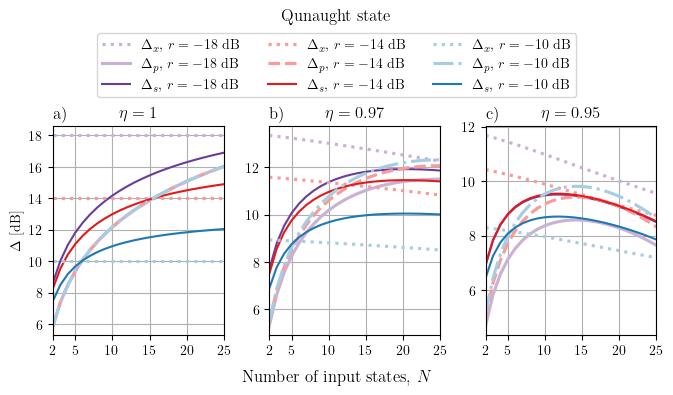

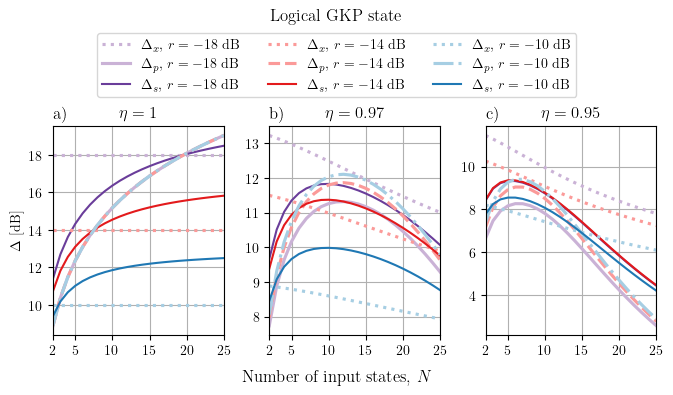

In [8]:

mpl.rcParams.update({'font.size': 10, "text.usetex": True, 'font.family':'serif'})

cm = sns.color_palette(palette = 'Paired')
#cm = plt.cm.tab20(range(12))
cx = [cm[0], cm[2], cm[4], cm[6], cm[8], cm[10]]
cp = [cm[1], cm[3], cm[5], cm[7], cm[9], cm[11]]

rsi = [4, 2, 0]

lines = ['solid','', 'dashed','','dashdot']

lines = ['dashdot','', 'dashed','','solid']

kwargs = {'Dx': Delta_xs, 'Dp': Delta_ps, 'linewidth':1.5}

for j, grid in enumerate(grids):
    
    fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(2*colwidth,1 * colwidth))
    
    for i in rsi:
        r = rs[i]
        
        kwargs['cx'] = cx[i]
        kwargs['cp'] = cx[i]
        kwargs['cs'] = cp[i]
        kwargs['mx'] = '.'
        kwargs['mp'] = '.'
        
        kwargs['lx'] = 'dotted'
        #kwargs['lx'] = lines[i]
        kwargs['lp'] = lines[i]
        #kwargs['lp'] = 'dashed'
        kwargs['ls'] = 'solid'
        
        kwargs['labelx'] = rf'$\Delta_x$, $r={r}$ dB'
        kwargs['labelp'] = rf'$\Delta_p$, $r={r}$ dB'
        kwargs['labels'] = rf'$\Delta_s$, $r={r}$ dB'
        
        make_delta_plot(ax0, i, j, 0, **kwargs)
        ax0.set_title(r'$\eta=1$')
        ax0.set_title(r'a)', loc ='left')

        kwargs['labelx'] = None
        kwargs['labelp'] = None
        kwargs['labels'] = None
        
        make_delta_plot(ax1, i, j, 3, **kwargs)
        ax1.set_title(r'$\eta=0.97$')
        ax1.set_title(r'b)', loc ='left')
        make_delta_plot(ax2, i, j, 5, **kwargs)
        ax2.set_title(r'$\eta=0.95$')
        ax2.set_title(r'c)', loc ='left')
        #ax2.legend()
        if j == 0:
            ttl = fig.suptitle('Qunaught state', x = 0.5, y = 1.15)
        elif j == 1:
            ttl = fig.suptitle('Logical GKP state',x = 0.5, y = 1.15)
        ax0.set_ylabel(r'$\Delta$ [dB]')
        
    lgd = fig.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.5,1.1), ncol=3)
    lbl = fig.supxlabel(r'Number of input states, $N$', x = 0.5, y = 0.05)
    fig.set_tight_layout('tight')
    plt.savefig(f'figures/Deltas_{grid}.pdf', bbox_extra_artists=(lgd,lbl, ttl), bbox_inches='tight')
        
